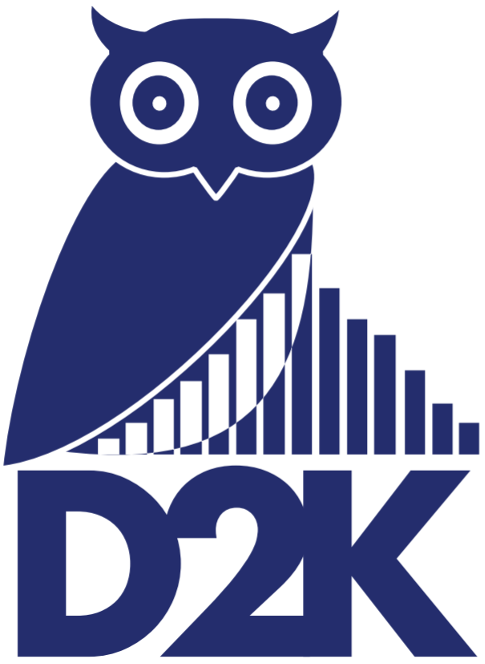 

<center>

# Welcome to DSCI 101 #
### Introduction to Data Science ###

### Code Demo for Week 9 ###

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(2024)

# Statistical Inference

## TX State Employees Income Data ##

[Data Source](https://salaries.texastribune.org/)

This database of compensation for Texas state employees is published by The Texas Tribune, a nonprofit and nonpartisan news organization. 

In [ ]:
# most recent data updated on 1/1/2024
tx_salary = pd.read_csv('https://s3.amazonaws.com/raw.texastribune.org/state_of_texas/salaries/02_non_duplicated_employees/2024-01-01.csv')
print(tx_salary.shape)
print(tx_salary.dtypes)
tx_salary.head()

### Minimun cleaning
- drop columns not useful
- clean up extra space in all text columns

In [ ]:
# drop columns not needed
tx_salary.drop(columns = ['duplicated','multiple_full_time_jobs','combined_multiple_jobs',
                          'summed_annual_salary', 'hide_from_search'], inplace=True)
# clean up some text columns that has extra space
for col in tx_salary.columns:
    if tx_salary.dtypes[col]=='O':
        tx_salary[col] = tx_salary[col].str.strip()

### Explore the data for a little bit

**Practice:** Fill in code to anwser the following questions:
- who earns the highest salary (use `ANNUAL` column) in the data? 
- how much does the `GOVERNOR` (use `JC TITLE` column) earn?
- how much on average do [actuaries](https://en.wikipedia.org/wiki/Actuary) working for TX government earn?
    - we can use [`str.contains`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html)`('ACTUARY')` in `JC TITLE` column

In [ ]:
# who has the highest annual salary?
...

In [ ]:
# how much does the Governor make?
...

In [ ]:
# search for some job title using partial string match
# this returns average salary values for job that contains 'ACTUARY'
...

**Practice:** Let's create a subset named `tx_salary_recent`, that only contains all the full-time employees (using `HRSWKD`>=40) that are hired in and after 2020. We will use this subset as our population.
- caution: `HIREDT` is a string!!!
- [`pd.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [ ]:
### your code here
...

**Practice:** We will use `tx_salary_recent` as our population from now on.
- Calculate the median annual salary for your subset `tx_salary_recent`, round to integer and name this as `pop_median`, as population median. 
- Generate summary statistics for the `ANNUAL` salary column in `tx_salary_recent`: the 50% should match your `pop_median`.
- Use the bins named `tx_bins` to create a histogram for `ANNUAL` salary in `tx_salary_recent`.

In [ ]:
### your code here
...

In [ ]:
### your code here
...

In [ ]:
### your code here
tx_bins = np.arange(0, 300000, 5000)
...
plt.title('Tx State Employees Annual Salary')
plt.xlabel('Annual Salary in $');

## Simulate sampling distribution

**Practice:** 
- Create a random sample of 300 from this population, name it `tx_salary_sample`. 
    - use [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) WITHOUT replacement.
    - set `random_state=2023` so your result is reproducible.
- Plot a histogram of the salary distribution of your random sample using the same bin `tx_bins`.
- Calculate the sample median of your 300 random sample, round to integer and name it `sample_median` and compare with `pop_median`.

In [ ]:
### your code here
sample_size = 300
...
plt.title('Sample of 300 Tx State Employees Annual Salary')
plt.xlabel('Annual Salary in $');

In [ ]:
sample_median = round(tx_salary_sample['ANNUAL'].median())
print('Population median: ', pop_median)
print('Sample median: ', sample_median)

Run the following code to visually compare the distribution of a random sample with the population. Notice I have set both histogram to use the same bins and set `density=True`. Feel free to change the `sample_size` and other settings and run it multiple times. 

In [ ]:
# now take a random sample and compare histogram 
# with the population original histogram

# ways to create subplots: plt.subplot(rows, columns, subplot_number)
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
tx_salary_sample['ANNUAL'].plot(kind='hist', bins=tx_bins, density=True)
plt.xlabel('TX Gov Employee Annual Salary')
plt.title('A sample of '+str(sample_size)+' employee')
plt.subplot(1, 2, 2)
tx_salary_recent['ANNUAL'].plot(kind='hist', bins=tx_bins, density=True)
plt.xlabel('TX Gov Employee Annual Salary')
plt.title('All '+str(tx_salary_recent.shape[0])+' employees');

**Practice:**

- Repeat the following steps 10000 times:
    - generate a random sample of 300
        - here you want different random sample each time! Therefore, please do NOT fix random_state in df.sample.
    - calculate sample median of annual salary for each random sample
    - save the sample median in a list named `sample_medians`

After you run your code, you will have 10000 sample medians!

In [ ]:
### your code here
sample_medians = []
rep = 10000

...

In [ ]:
### plot your sample_medians to take a look
plt.hist(sample_medians, bins=30);

In [ ]:
### visualize your result

plt.hist(sample_medians, bins=30, alpha=0.4)
# plot the true population median as red dot
# x is the actual value of median
# y is the hight of your dot, adjust to show the dot, 
# s is the size of the dot

# plot the population median as red dot
plt.scatter(x=pop_median, y=200, s=100, color='red', label='pop median', zorder=1)
# plot the original sample median (with 300 samples) as blue dot
plt.scatter(x=sample_median, y=200, s=100, color='blue', label='sample median', zorder=2)
# add title, label and legend
plt.title('sampling distribution of sample median with sample size '+ str(sample_size))
plt.xlabel('TX Gov employees annual salary median')
plt.legend();

# in reality you don't know the truth (the red dot)
# you try to estimate the red dot with the sample median (the blue dot)

In [ ]:
### calculate the confidence interval for the median
left = round(np.percentile(sample_medians, 2.5))
right = round(np.percentile(sample_medians, 97.5))
confidence_interval = [left, right]
print('95% confidence interval for median annual salary: ', confidence_interval)

In [ ]:
### plot with the confidence interval 

plt.hist(sample_medians, bins=30, alpha=0.4)
plt.scatter(x=pop_median, y=200, s=100, color='red', zorder=2, label='pop median')
plt.scatter(x=one_sample_median, y=200, s=100, color='blue', zorder=2, label='sample median')
# plot the CI as horizontal line close to x-axis
# adjust hight of line and its width lw to show
plt.plot([left, right], [50,50], color='yellow', lw=10, zorder=1, label='95% CI of sample median')
plt.title('sampling distribution of sample median with sample size '+ str(sample_size))
plt.xlabel('TX Gov employees annual salary median')
plt.legend();

## Inference using Bootstrap

From now on, you only have access to your original sample `tx_salary_sample`. Carry out bootstrap technique to simulate the sampling distribution of the sample median, estimate a 95% confidence interval. 
- recall that a bootstrap resample is generated by
    - sample randomly WITH REPLACEMENT from the original sample
    - each bootstrap resample has the same sample size as the original sample

In [ ]:
# one bootstrap resample 
one_boot_sample = tx_salary_sample.sample(sample_size, replace=True)
one_boot_median = round(one_boot_sample['ANNUAL'].median())
print('Original sample median: ', sample_median)
print('One bootstrap resample median: ', one_boot_median)

**Practice:**

- Repeat the following steps 10000 times:
    - generate a bootstrap resample from the original sample
    - calculate the boot median of annual salary for each boot resample
    - save the sample median in a list named `boot_medians`

- After you run your code, you will have 10000 bootstrap resample medians. 
    - visualize the sampling distribution of your bootstrap resample median
    - plot the population median and the original sample median
    - calculate and plot the 95% bootstrap confidence interval

In [ ]:
### your code here
boot_medians = []
rep = 10000

...

In [ ]:
### calculate the confidence interval for the median
left = round(np.percentile(boot_medians, 5))
right = round(np.percentile(boot_medians, 95))
boot_confidence_interval = [left, right]
print('90% bootstrap CI for median annual salary: ', boot_confidence_interval)

In [ ]:
# visualize 

plt.hist(boot_medians, bins=20, alpha=0.4)
plt.scatter(x=pop_median, y=200, s=100, color='red', zorder=2, label='pop median')
plt.scatter(x=sample_median, y=200, s=100, color='blue', zorder=2, label='sample median')
plt.plot([left, right], [50,50], color='yellow', lw=10, zorder=1, label='95% CI of sample median')
plt.title('Bootstrap sampling distribution of sample median')
plt.xlabel('TX Gov employees annual salary median')
plt.legend();

### The big simulation

Now do the bootstrap process multiple times to generate many CIs: 
1. take one random sample of a fixed sample size from the population `tx_salary_recent`, 
2. generate 10000 bootstrap resamples based on that random sample,
3. use the middle 95% of the bootstrap medians as our confidence interval,
4. repeat 1, 2, 3 multiple times (100 times here)

This is a nested for loop: the outside loop is to repeatedly generate a random sample from the population, we do this 100 times. The inside loop is to generate 10000 bootstrap resamples for each random sample generated, and calculate median from each bootstrap resample. Once the inside loop finishes, we then have 10000 sample medians (a sampling distribution of the sample median), we then create a 95% CI by taking the middle 95% of the sampling distribution. When the outside loop finishes, we have got 100 CIs in total. 

Please read the code and run it yourself!

In [ ]:
# THE BIG LOOOOOOOOP: This one takes a long time.
# Generate 100 different bootstrap confidence intervals (CI)
# Each bootstrap CI are based on 10000 bootstrap resamples


sample_size = 300
rep = 100
boot_rep = 10000
# place holder for CI left and right ends
left_ends = []
right_ends = []

# outside loop for generate CI: 100 times
for i in np.arange(rep):
    # take one random sample from the population
    one_sample = tx_salary_recent.sample(sample_size, replace=False)
    # place holder for bootstrap resample medians
    boot_medians = []
    # inside loop for bootstrap: 10000 times
    for i in np.arange(boot_rep):
        # generate one bootstrap resample
        one_boot_sample = one_sample.sample(sample_size, replace=True)
        # calculate one median
        one_boot_median = one_boot_sample['ANNUAL'].median()
        # save the median
        boot_medians = np.append(boot_medians, one_boot_median)
        # end of inside loop for bootstrap medians
        
    # get CI from 10000 bootstrap medians and save
    left_ends = np.append(left_ends, np.percentile(boot_medians, 2.5))
    right_ends = np.append(right_ends, np.percentile(boot_medians, 97.5))
    # end of outside loop

In [ ]:
# organize the 100 intervals as a dataframe
intervals = pd.DataFrame({'CI_Left': left_ends, 'CI_Right': right_ends})    

intervals

In [ ]:
# plot the 100 confidence intervals as 100 horizontal line stacking on each other
rep = 100
for i in np.arange(rep):
    left = intervals.loc[i,'CI_Left']
    right = intervals.loc[i,'CI_Right']
    plt.plot([left, right], [i, i], color='blue', lw=3, zorder=1, alpha=0.5)
    
# plot the population median as a red vertical line 
plt.plot([pop_median, pop_median], [0, rep], color='red', lw=5, zorder=2)
plt.xlabel('TX Gov employees annual salary median')
plt.xticks(fontsize=12);

**Practice:**
- How to calculate the number and proportion of the CIs above that actually contain the truth? This is counting how many of the horizontal blue lines were corssed by the vertical red lilne. But of course you need to use code to calculate this number (or proportion out of 100). 
- As the number of loops increases, this proportion should get closer and closer to 95%!

In [ ]:
### your code here
good_perc = ...
good_perc